Hallo zusammen,

in diesn Binder schauen wir uns die die Auswirkung verschiedener Parameter auf die Genauigkeit des Models an. Im folgenden wird die Netzarchitektur, Epochenanzahl, Optimizer, Aktivierungsfunktionen sowie die batchsize und Learningrate angeschaut.

Es wurde Wert auf die Nachvollziehbarkeit und ausführlichkeit gelegt und dabei die Performance im auge behalten.
Am Ende gibt es noch eine kleine Datenanalyse um das Ergebnis noch zu visualisieren

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sn

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_validation, y_validation) = mnist.load_data()
x_train, x_validation = x_train / 255.0, x_validation / 255.0

Wir schauen uns erstmal an was das Netz als Input bekommt. Dazu schauen wir uns die ersten 50 zahlen an, so wie das Netz sie verarbeitet


 Plot of the first 25 samples in the MNIST training set


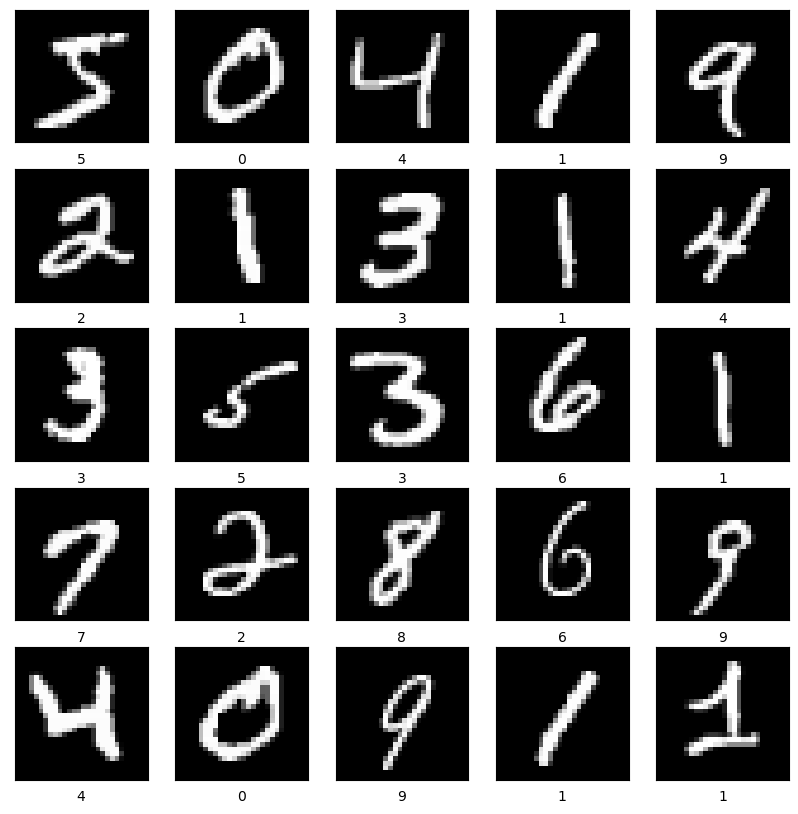

In [91]:
numbers_to_display = 50
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

## Meine ersten Tests beziehen sich auf verschiedene Layerkonfigurationen:
The size of a network, its storage capacity, setting possibilities and ability to learn is determined. In the next part, it is examined whether the number of layers and the neurons in a network also increases the accuracy of the predictions or whether it is overfitted.
In the following, it is examined whether the number of layers and the neurons in a network also increases the accuracy of the predictions or whether it is overdue.
The number of patterns that a KNN can learn depends on the number of nodes. In conjunction with the number of layers, they indicate how many extensive patterns a network can learn. The size and the convoluity have an influence on the over- or underfitting of the net. Too many neurons complicate and too little simplify what is over- or underadjustment.

Model 1 is my benchmark in my whole test.

Various nodes and layers were considered for the investigation:


    Model 1  consists of     4 Layers * 512 neurons
    Model 2  consists of     2 Layers * 512 neurons
    Model 3  consists of     4 Layers * 256 neurons
    Model 4  consists of     4 Layers mit 512, 256, 128, 64 neurons

In [88]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
    
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history1 = model1.fit(x_train, y_train, epochs=10, shuffle=True)

_, validation_acc_temp1 = model1.evaluate(x_validation, y_validation)
validation_acc = round(validation_acc_temp1 * 100, 4)
print('validation accuracy:', validation_acc )


Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2134 - accuracy: 0.9361
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1033 - accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0773 - accuracy: 0.9774
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0614 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0518 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0427 - accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0397 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0357 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0299 - accuracy: 0.9913
Epoch 10/10
313/313 [==============================] - 1s 4ms/st

In [89]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),

  # Design 0. without regularization:
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit model on training data (without regularization)
history2 = model2.fit(x_train, y_train, epochs=10, shuffle=True)

# Evaluate performance on validation set
_, validation_acc_temp2 = model2.evaluate(x_validation, y_validation)
validation_acc2 = round(validation_acc_temp2 * 100, 4)
print('validation accuracy2:', validation_acc2, '%')

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1846 - accuracy: 0.9442
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0808 - accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0560 - accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0421 - accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0370 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0279 - accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0260 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0232 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0195 - accuracy: 0.9940
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss

In [90]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),

  # Design 0. without regularization:
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
    
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit model on training data (without regularization)
history3 = model3.fit(x_train, y_train, epochs=10, shuffle=True)

# Evaluate performance on validation set
_, validation_acc_temp3 = model3.evaluate(x_validation, y_validation)
validation_acc3 = round(validation_acc_temp3 * 100, 4)
print('validation accuracy3:', validation_acc3, '%')

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2139 - accuracy: 0.9356
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0983 - accuracy: 0.9715
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0734 - accuracy: 0.9780
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0586 - accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0487 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0425 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0357 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0317 - accuracy: 0.9903
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0297 - accuracy: 0.9916
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0760

In [91]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),

  # Design 0. without regularization:
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
 

  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
    
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model4.compile(optimizer='Adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit model on training data (without regularization)
history4 = model4.fit(x_train, y_train, epochs=10, shuffle=True)

# Evaluate performance on validation set
_, validation_acc_temp4 = model4.evaluate(x_validation, y_validation)
validation_acc4 = round(validation_acc_temp4 * 100, 4)
print('validation accuracy4:', validation_acc4, '%')

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2069 - accuracy: 0.9373
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0942 - accuracy: 0.9714
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0680 - accuracy: 0.9798
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0537 - accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0427 - accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0367 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0306 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0269 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0252 - accuracy: 0.9926
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss

Nach dem die Modelle gelernt und validiert wurden, kommen wir zum ersten Vergleich.
Dabei wird die Genauigkeit der Validierungsdaten mit Model 1 verglichen.
Alle Netze lernen 10 Epochen und haben die gleichen compile configurationen.

In [51]:
print('Genauigkeit vom Benchmark: ' ,validation_acc, '%')
print('Genauigkeit von Model 2:   ' ,validation_acc2, '%')
print('Genauigkeit von Model 3:   ' ,validation_acc3, '%')
print('Genauigkeit von Model 4:   ' ,validation_acc4, '%\n')

Diff1 = round(validation_acc - validation_acc2, 4)
print("Der Unterschied von Model 2 zu Model 1 beträgt: ", Diff1, "%")
Diff2 = round(validation_acc - validation_acc3, 4)
print("Der Unterschied von Model 3 zu Model 1 beträgt: ", Diff2, "%")
Diff3 = round(validation_acc - validation_acc4, 4)
print("Der Unterschied von Model 4 zu Model 1 beträgt: ", Diff3, "%")

Genauigkeit vom Benchmark:  97.79 %
Genauigkeit von Model 2:    97.85 %
Genauigkeit von Model 3:    98.04 %
Genauigkeit von Model 4:    97.93 %

Der Unterschied von Model 2 zu Model 1 beträgt:  -0.06 %
Der Unterschied von Model 3 zu Model 1 beträgt:  -0.25 %
Der Unterschied von Model 4 zu Model 1 beträgt:  -0.14 %


Meine Daten:

    Genauigkeit vom Benchmark:  97.97 %
    Genauigkeit von Model 2:    98.2 %
    Genauigkeit von Model 3:    98.0 %
    Genauigkeit von Model 4:    98.26 %

    Der Unterschied von Model 2 zu Model 1 beträgt:  -0.23 %
    Der Unterschied von Model 3 zu Model 1 beträgt:  -0.03 %
    Der Unterschied von Model 4 zu Model 1 beträgt:  -0.29 %

After which the models have been learned and validated, we come to the first comparison. The accuracy of the validation data is compared to Model 1. All networks learn 10 epochs and have the same compile configurations.

Ergebnisse:  Model 2 und 4 sind nur geringfügig genauer und Model 3 in relation gleich genau.
Man sieht keine großen Verbesserungen bei diesen einfachen Netzwerk. Genauigkeit schwankt auch leicht. 
Herauszuheben ist dennoch, dass Model 3 mit 0,2 der Lernzeit von Model 1 nahezu die gleiche Genauigkeit erzeugen.


Hier ist die Genauigkeit und der Loss von Model1-4 dargestellt

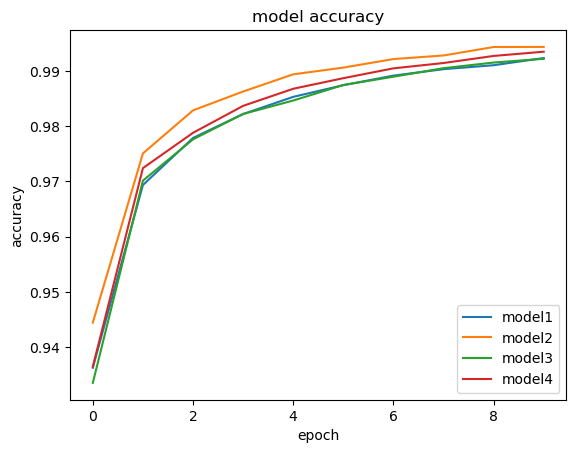

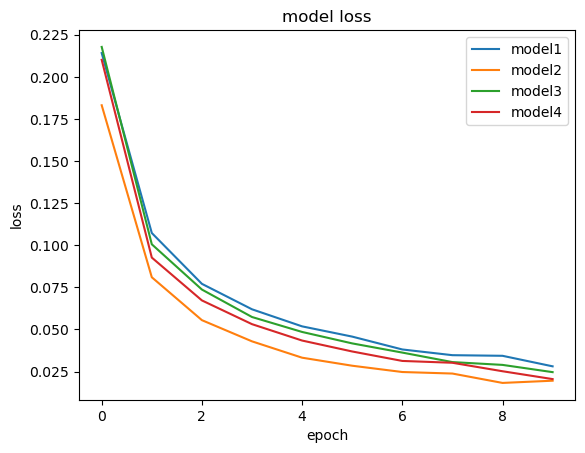

In [52]:
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history4.history['accuracy'])


plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model1', 'model2', 'model3', 'model4'], loc='lower right')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.plot(history4.history['loss'])


plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model1', 'model2', 'model3', 'model4'], loc='upper right')
plt.show()

In den ersten Diagramm also das Genauigkeitsdiagramm sieht man, dass Model 2 die höhste Genauigkeit im Lernset hatte und somit auch die größte Abweichunng zum Validation-set.

Im Loss-Diagramm ist auch zu sehen, dass Model 1,3,4 relativ nah beieinander sind so relativ gleich arbeiten, jedoch ist der Loss von Model 2 wieder sichtbar geringer, was zum Genauigkeitsdiagramm passt.



## In germany we say "Übung macht den Meister" and i think that's beautiful.
In the language of the neural networks, a single pass through the feedback loop is often referred to as an epoch. So the larger the number of epochs of a neural network, the longer it has been trained.

In the next step, we're looking at the influence of the epochs.

In [59]:
epoch_list = [2, 7, 20]
history_epochs_list = [0,0,0]
validation_epochs_list = [0,0,0]
for i in range(3):
    temp_modelname = 'model' + str(epoch_list[i])
    name = 'model' + str(epoch_list[i])
    temp_modelname = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
    
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
    
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    temp_modelname.compile(optimizer= 'adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = temp_modelname.fit(x_train, y_train, epochs= epoch_list[i], shuffle=True)
    
    _, validation_temp = temp_modelname.evaluate(x_validation, y_validation)
    validation_epochs_list[i] = round(validation_temp * 100, 4)
    print('validation accuracy of', name, 'is:', validation_epochs_list[i], ' %\n' )

Epoch 1/2
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2110 - accuracy: 0.9376
Epoch 2/2
313/313 [==============================] - 1s 4ms/step - loss: 0.1110 - accuracy: 0.9687
validation accuracy of model2 is: 96.87  %

Epoch 1/7
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2128 - accuracy: 0.9364
Epoch 2/7
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1082 - accuracy: 0.9694
Epoch 3/7
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0765 - accuracy: 0.9780
Epoch 4/7
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0606 - accuracy: 0.9824
Epoch 5/7
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0497 - accuracy: 0.9854
Epoch 6/7
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0449 - accuracy: 0.9873
Epoch 7/7
313/313 [==============================] - 1s 4ms/step - loss: 0.0942 - accuracy: 0.9788
validation accuracy of model7 is: 97.

In [94]:
print('Genauigkeit vom Benchmark:    ', validation_acc, '%')
print('Genauigkeit von Model ep_2:   ', validation_epochs_list[0], '%')
print('Genauigkeit von Model ep_7:   ', validation_epochs_list[1], '%')
print('Genauigkeit von Model ep_20:  ', validation_epochs_list[2], '%\n')

Diff_ep2 = round(validation_acc - validation_epochs_list[0], 4)
print("Der Unterschied von Model_ep2 zu Model 1 beträgt:  ", Diff_ep2, "%")
Diff_ep7 = round(validation_acc - validation_epochs_list[1], 4)
print("Der Unterschied von Model_ep7 zu Model 1 beträgt:  ", Diff_ep7, "%")
Diff_ep20 = round(validation_acc - validation_epochs_list[2], 4)
print("Der Unterschied von Model_ep20 zu Model 1 beträgt: ", Diff_ep20, "%")

Genauigkeit vom Benchmark:     97.89 %
Genauigkeit von Model ep_2:    96.38 %
Genauigkeit von Model ep_7:    97.88 %
Genauigkeit von Model ep_20:   98.26 %

Der Unterschied von Model_ep2 zu Model 1 beträgt:   1.51 %
Der Unterschied von Model_ep7 zu Model 1 beträgt:   0.01 %
Der Unterschied von Model_ep20 zu Model 1 beträgt:  -0.37 %


I can confirm my thesis "exercise makes perfect". The longer the model learns, the more accurate the prediction. Too much learning leads to overfitting and the network learns the training set by heart, which makes many errors happen at the validation set. Overfitting can be prevented by applying the dropout technique. In this case, one observation is in each case randomly excluded from the algorithm. This will affect all other connections of the nodes. The dropout method will not be tried in the following tests.

## Nach dem wir uns die Layerstrukturen und die Learning Epochen angeschaut haben, werden wir im nächsten Schritt verschiedene optimizer testen.
Beim Trainieren von Deep Learning Modellen geht es im Wesentlichen darum, die Gewichtungen des neuronalen Netzes so lange anzupassen, bis das globale Minimum der Verlustfunktion gefunden wird. Diese Aufgabe übernimmt der Optimizer. Die für meisten Anwendungen geeignetesten Optimizer basieren auf dem Gradientenstufenverfahren, bei dem die Gewichtungsanpassungen anhand des Gradienten der Verlustfunktion berechnet werden.
Dabei nehmen wir die Optimizer: 'Adamax', 'Nadam', 'RMSprop', 'Adadelta', 'Adagrad', 'SGD näher unter die Lupe.

**Adam Optimizer** im Benchmark:
Eine Kombination aus der Idee des Momentum Optimierers und RMSProp ergibt die Adam-Optimierung.
Adam ist dabei die Abkürzung für Adaptive Moment Estimation. Bei der Kombination betrachtet das Verfahren nun sowohl den Durchschnitt der vorigen Gradienten (Momentum Optimierer) als auch den Durchschnitt der quadrieten Gradienten (**RMSProp, Adadelta, Adagrad**), beide unter exponentiellem Zerfall.

**Adamax und Nadam**
Eine Funktion, die sich pro Iteration ändert (beispielsweise durch das Implementieren des Stochastik oder Mini-Batch Gradientenverfahrens).
Eine Veränderung von Adam erhält man indem man den Anteil des Momentum Optimierers durch
den von Nesterov ersetzt. Diese nennt sich dann Nadam („Nesterovs Adaptive Moment Estimation“).
Der Optimizer **SGD** (Stochastic Gradient Descent) rechnet nur mit stochastischen Methoden. SGD by itself is inherently sequential: Step-by-step, we progress further towards the minimum. Running it provides good convergence but can be slow particularly on large datasets. 

Quelle: https://docplayer.org/201945619-Numerische-optimierung-fuer-deep-learning-algorithmen.html

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2088 - accuracy: 0.9353
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0828 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0523 - accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0333 - accuracy: 0.9898
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0209 - accuracy: 0.9936
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0145 - accuracy: 0.9955
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0102 - accuracy: 0.9968
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0081 - accuracy: 0.9975
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0045 - accuracy: 0.9986
Epoch 10/10
313/313 [==============================] - 1s 4ms/st

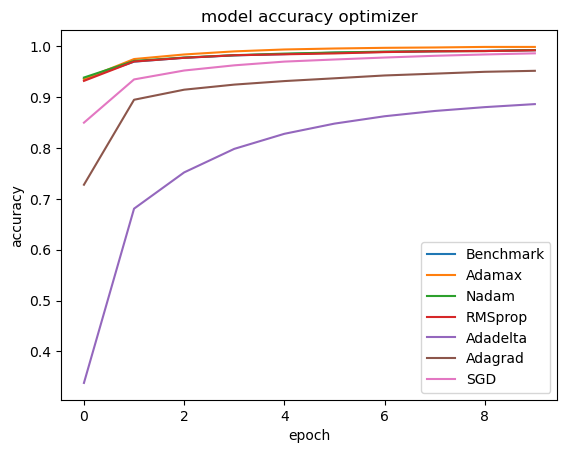

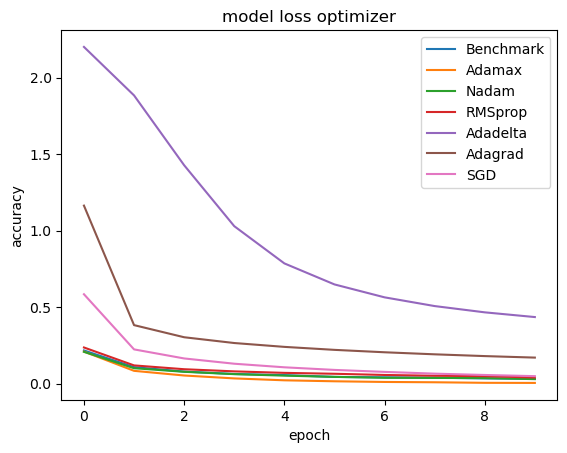

In [81]:
optimizer_list = ['Adamax', 'Nadam', 'RMSprop', 'Adadelta', 'Adagrad', 'SGD']
history_optimizer_list = [0,0,0,0,0,0]
validation_optimizer_list = [0,0,0,0,0,0]
for i in range(6):
    temp_modelname = 'model_' + str(optimizer_list[i])
    name = 'model_' + str(optimizer_list[i])
    temp_modelname = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
    
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
    
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    temp_modelname.compile(optimizer=optimizer_list[i],
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history_optimizer_list[i] = temp_modelname.fit(x_train, y_train, epochs= 10, shuffle=True)
    
    
    _, validation_temp = temp_modelname.evaluate(x_validation, y_validation)
    validation_optimizer_list[i] = round(validation_temp * 100, 4)
    print('validation accuracy of', name, 'is:', validation_optimizer_list[i], ' %\n' )
    
    if i == 5:
        plt.plot(history1.history['accuracy'])
        plt.plot(history_optimizer_list[0].history['accuracy'])
        plt.plot(history_optimizer_list[1].history['accuracy'])
        plt.plot(history_optimizer_list[2].history['accuracy'])
        plt.plot(history_optimizer_list[3].history['accuracy'])
        plt.plot(history_optimizer_list[4].history['accuracy'])
        plt.plot(history_optimizer_list[5].history['accuracy'])
        plt.title('model accuracy optimizer')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['Benchmark','Adamax', 'Nadam', 'RMSprop', 'Adadelta', 'Adagrad', 'SGD'], loc='lower right')
        plt.show()
        
        plt.plot(history1.history['loss'])
        plt.plot(history_optimizer_list[0].history['loss'])
        plt.plot(history_optimizer_list[1].history['loss'])
        plt.plot(history_optimizer_list[2].history['loss'])
        plt.plot(history_optimizer_list[3].history['loss'])
        plt.plot(history_optimizer_list[4].history['loss'])
        plt.plot(history_optimizer_list[5].history['loss'])
        plt.title('model loss optimizer')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['Benchmark','Adamax', 'Nadam', 'RMSprop', 'Adadelta', 'Adagrad', 'SGD'], loc='upper right')
        plt.show()

Auswertung:

In [111]:
print('Genauigkeit vom Benchmark:      ', validation_acc, '%')
print('Genauigkeit von Model Adamax:   ', validation_optimizer_list[0], '%')
print('Genauigkeit von Model Nadam:    ', validation_optimizer_list[1], '%')
print('Genauigkeit von Model RMSprop:  ', validation_optimizer_list[2], '%')
print('Genauigkeit von Model Adadelta: ', validation_optimizer_list[3], '%')
print('Genauigkeit von Model Adagrad:  ', validation_optimizer_list[4], '%')
print('Genauigkeit von Model SGD:      ', validation_optimizer_list[5], '%\n')

Diff_Adamax = round(validation_acc - validation_optimizer_list[0], 4)
print("Der Unterschied von Adamax zu Model 1 beträgt:    ", Diff_Adamax, "%")
Diff_Nadam = round(validation_acc - validation_optimizer_list[1], 4)
print("Der Unterschied von Nadam zu Model 1 beträgt:     ", Diff_Nadam, "%")
Diff_RMSprop = round(validation_acc - validation_optimizer_list[2], 4)
print("Der Unterschied von RMSprop zu Model 1 beträgt:   ", Diff_RMSprop, "%")
Diff_Adadelta = round(validation_acc - validation_optimizer_list[3], 4)
print("Der Unterschied von Adadelta zu Model 1 beträgt:  ", Diff_Adadelta, "%")
Diff_Adagrad = round(validation_acc - validation_optimizer_list[4], 4)
print("Der Unterschied von Adagrad zu Model 1 beträgt:   ", Diff_Adagrad, "%")
Diff_SGD = round(validation_acc - validation_optimizer_list[5], 4)
print("Der Unterschied von SGD zu Model 1 beträgt:       ", Diff_SGD, "%")

Genauigkeit vom Benchmark:       97.89 %
Genauigkeit von Model Adamax:    98.11 %
Genauigkeit von Model Nadam:     97.88 %
Genauigkeit von Model RMSprop:   97.97 %
Genauigkeit von Model Adadelta:  89.39 %
Genauigkeit von Model Adagrad:   95.05 %
Genauigkeit von Model SGD:       97.28 %

Der Unterschied von Adamax zu Model 1 beträgt:     -0.22 %
Der Unterschied von Nadam zu Model 1 beträgt:      0.01 %
Der Unterschied von RMSprop zu Model 1 beträgt:    -0.08 %
Der Unterschied von Adadelta zu Model 1 beträgt:   8.5 %
Der Unterschied von Adagrad zu Model 1 beträgt:    2.84 %
Der Unterschied von SGD zu Model 1 beträgt:        0.61 %


Meine Werte:

    Genauigkeit vom Benchmark:       97.97 %
    Genauigkeit von Model Adamax:    98.21 %
    Genauigkeit von Model Nadam:     97.77 %
    Genauigkeit von Model RMSprop:   97.84 %
    Genauigkeit von Model Adadelta:  89.27 %
    Genauigkeit von Model Adagrad:   95.14 %
    Genauigkeit von Model SGD:       97.67 %

    Unterschied Adamax zu Adam beträgt:   -0.24 %
    Unterschied Nadam zu Adam beträgt:     0.2 %
    Unterschied RMSprop zu Adam beträgt:   0.13 %
    Unterschied Adadelta zu Adam beträgt:  8.7 %
    Unterschied Adagrad zu Adam beträgt:   2.83 %
    Unterschied SGD zu Adam beträgt:       0.3 %
    
Alle getesteten Opizimer sind in diesen Beispiel schlechter als Adam, außer AdaMax.
Besonders ungeeignet ist Adadelta und der mit ihn verwandte optimizer Adagrad.

## Nächster Test mit verschiedenen Activation funktionen

Wir müssen Aktivierungsfunktionen wie ReLu, Sigmoid und tanh verwenden, um dem neuronalen Netzwerk eine nicht lineare Eigenschaft zu verleihen. Auf diese Weise kann das Netz komplexere Beziehungen und Muster in den Daten modellieren.
An dieser Stelle sollten wir die wichtigsten Aktivierungsfunktionen, die beim Deep Learning verwendet werden.

Im Benchmark wird ReLU verwendet. The Rectified Linear Unit is the most commonly used activation function in deep learning models. The function returns 0 if it receives any negative input, but for any positive value  x  it returns that value back. So it can be written as f(x)=max(0,x).

Softmax wird hier immer in der letzten Schicht angewandt und nur dann, wenn das neuronale Netz bei Klassifizierungsaufgaben Wahrscheinlichkeitswerte vorhersagen soll.

In [74]:
activation_list = ['sigmoid', 'softplus', 'tanh', 'softsign']
history_activation_list = [0,0,0,0]
validation_activation_list = [0,0,0,0]
for i in range(4):
    temp_modelname = 'model_' + str(activation_list[i])
    name = 'model_' + str(activation_list[i])
    temp_modelname = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
    
      tf.keras.layers.Dense(512, activation= activation_list[i]),
      tf.keras.layers.Dense(512, activation= activation_list[i]),
      tf.keras.layers.Dense(512, activation= activation_list[i]),
      tf.keras.layers.Dense(512, activation= activation_list[i]),
    
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    temp_modelname.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history_activation_list[i] = temp_modelname.fit(x_train, y_train, epochs= 10, shuffle=True)
    
    
    _, validation_temp = temp_modelname.evaluate(x_validation, y_validation)
    validation_activation_list[i] = round(validation_temp * 100, 4)
    print('validation accuracy of', name, 'is:', validation_activation_list[i], ' %\n' )

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4068 - accuracy: 0.8689
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1526 - accuracy: 0.9545
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1037 - accuracy: 0.9692
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0789 - accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0606 - accuracy: 0.9817
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0473 - accuracy: 0.9856
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0386 - accuracy: 0.9880
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0317 - accuracy: 0.9902
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0268 - accuracy: 0.9915
Epoch 10/10
313/313 [==============================] - 1s 4ms/st

SoftPlus is a smooth approximation to the ReLU function and can be used to constrain the output of a machine to always be positive.
For numerical stability the implementation reverts to the linear function for inputs above a certain value.

Tanh is like logistic sigmoid but better. The range of the tanh function is from (-1 to 1). tanh is also sigmoidal (s - shaped). The advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.

As an alternative to hyperbolic tangent, softsign is an activation function for neural networks. Even though tanh and softsign functions are closely related, tanh converges exponentially whereas softsign converges polynomially. Even though softsign appears in literature, it would not be adopted in practice as much as tanh.

In [ ]:
print('Genauigkeit vom Benchmark:        ', validation_acc, '%')
print('Genauigkeit von Model sigmoid:    ', validation_acc_sigmoid, '%')
print('Genauigkeit von Model softplus:   ', validation_acc_softplus, '%')
print('Genauigkeit von Model softsign:   ', validation_acc_softsign, '%')
print('Genauigkeit von Model tanh:       ', validation_acc_tanh, '%\n')

Diff_sigmoid = round(validation_acc - validation_acc_sigmoid, 4)
print("Der Unterschied von Model sigmoid zu Model 1 beträgt:    ", Diff_sigmoid, "%") 
Diff_softplus = round(validation_acc - validation_acc_softplus, 4)
print("Der Unterschied von Model softplus zu Model 1 beträgt:    ", Diff_softplus, "%") 
Diff_softsign = round(validation_acc - validation_acc_softsign, 4)
print("Der Unterschied von Model softsign zu Model 1 beträgt:    ", Diff_softsign, "%")
Diff_tanh = round(validation_acc - validation_acc_tanh, 4)
print("Der Unterschied von Model tanh zu Model 1 beträgt:        ", Diff_tanh, "%")

Meine Daten

    Genauigkeit vom Benchmark:         97.79 %
    Genauigkeit von Model sigmoid:     97.91 %
    Genauigkeit von Model softplus:    98.27 %
    Genauigkeit von Model softsign:    97.34 %
    Genauigkeit von Model tanh:        97.23 %

    Der Unterschied von Model sigmoid zu Model 1 beträgt:     -0.12 %
    Der Unterschied von Model softplus zu Model 1 beträgt:     -0.48 %
    Der Unterschied von Model softsign zu Model 1 beträgt:     0.45 %
    Der Unterschied von Model tanh zu Model 1 beträgt:         0.56 %
    
Aus der Auswertung kann man entnehmen, dass sigmoid eine ähnliche Genauigkeit hat. Softsign und tanh sind ca. 0,5% schlechter. Die beste aktivierungsfunktion ist der softplus.



Wenn das neuronales Netz beispielsweise Werte vorhersagen soll, die größer als 1 sind, dann sind tanh oder Sigmoid nicht für die Ausgabeschicht geeignet, und wir müssen stattdessen ReLU oder ähnliche aktivierungsfunktionen verwenden.
Erwartet man hingegen, dass die Ausgabewerte im Bereich [0,1] oder [-1, 1] liegen, dann ist ReLU keine gute Wahl für die Ausgabeschicht und man muss sigmoid, tanh oder ähnliche verwenden.
Was jedoch die versteckten Schichten betrifft, so würde ich empfehlen, immer ReLU als Aktivierung für diese Schichten zu verwenden.

## Als nächsten verändern wir die batchsize und die learning Rate

Der wohl wichtigste Parameter beim Trainieren von Deep Learning Modellen mit dem Gradientenstufenverfahren ist die Lernrate des Optimizers. Sie gibt die Schrittweite an, mit der nach jeder Iteration die Richtung zum Minimum der Verlustfunktion gesucht wird. Die Richtung selbst wird durch den Gradienten der Verlustfunktion festgelegt. Die Schrittweite wird durch den Betrag des Gradienten, sowie der Lernrate als Vorfaktor bestimmt. Eine zu große Schrittweite bzw. Lernrate kann dazu führen, dass das gesuchte Minimum übersprungen und damit "übersehen" wird. Bei sehr schmalen Minima, kann es bei zu großer Schrittweite passieren, dass man aus dem Tal wieder herausspringt. Eine zu kleine Lernrate wiederum kann dazu führen, dass man in einem unerwünschten lokalen Minimum festsitzt. Außerdem konvergiert das System bei kleiner Schrittweite langsamer, wodurch sich die Trainingszeit verlängert.

Die Batch-Size (Stapelgröße) definiert, wie viele Samples aus dem Datensatz in einer Trainings-Iteration gleichzeitig verarbeitet werden. Der Trainings-Datensatz wird also in "Batches" aufgeteilt, die dann nacheinander durch das System propagiert werden, bis der gesamte Datensatz durchlaufen wurde und somit die Epoche abgeschlossen ist. Bei kleinen Datensätzen, die komplett in den vorhandenen Speicher passen, kann die BatchSize auch den gesamten Datensatz fassen, wodurch die Epoche dann nur aus einem einzigen Durchlauf besteht. In der Regel ist dies jedoch nicht der Fall, weshalb die Unterteilung in kleinere Batches sinnvoll ist. In der Fachliteratur wird die Batch auch häufig als Mini-Batch bezeichnet, um die Unterscheidung zum kompletten Datensatz deutlich zu machen. Da nach jeder Iteration die Gewichte im Modell an die Erkenntnisse aus der aktuell verwendeten Batch angepasst werden, hat auch die Wahl der Batch-Size Einfluss auf die Trainingsergebnisse.


Epoch 1/10
79/79 [==============================] - 5s 41ms/step - loss: 0.7806 - accuracy: 0.7891
Epoch 2/10
79/79 [==============================] - 4s 45ms/step - loss: 0.1564 - accuracy: 0.9538
Epoch 3/10
79/79 [==============================] - 3s 42ms/step - loss: 0.1118 - accuracy: 0.9664
Epoch 4/10
79/79 [==============================] - 4s 48ms/step - loss: 0.0943 - accuracy: 0.9714
Epoch 5/10
79/79 [==============================] - 3s 43ms/step - loss: 0.0786 - accuracy: 0.9754
Epoch 6/10
79/79 [==============================] - 3s 42ms/step - loss: 0.0757 - accuracy: 0.9769
Epoch 7/10
79/79 [==============================] - 3s 41ms/step - loss: 0.0551 - accuracy: 0.9824
Epoch 8/10
79/79 [==============================] - 3s 41ms/step - loss: 0.0567 - accuracy: 0.9820
Epoch 9/10
79/79 [==============================] - 3s 43ms/step - loss: 0.0482 - accuracy: 0.9847
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss: 0.1245 - accuracy: 0.9692
validati

235/235 [==============================] - 5s 22ms/step - loss: 0.0854 - accuracy: 0.9736
Epoch 3/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0570 - accuracy: 0.9821
Epoch 4/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0434 - accuracy: 0.9862
Epoch 5/10
235/235 [==============================] - 6s 23ms/step - loss: 0.0302 - accuracy: 0.9904
Epoch 6/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0285 - accuracy: 0.9909
Epoch 7/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0254 - accuracy: 0.9916
Epoch 8/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0223 - accuracy: 0.9928
Epoch 9/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0193 - accuracy: 0.9942
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0823 - accuracy: 0.9779
validation accuracy of model_b256_l0.001 is: 97.79  %

Epoch 1/10
235/235 [===========================

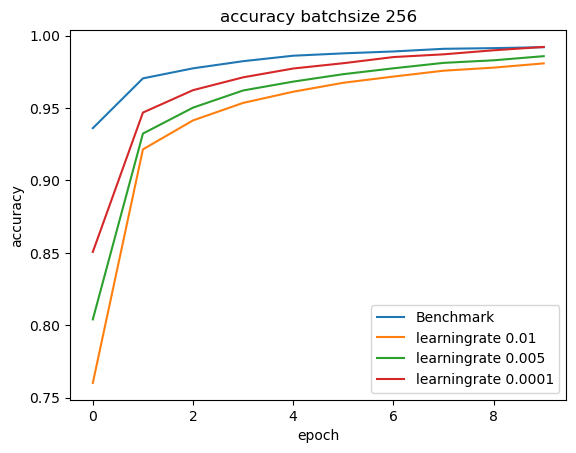

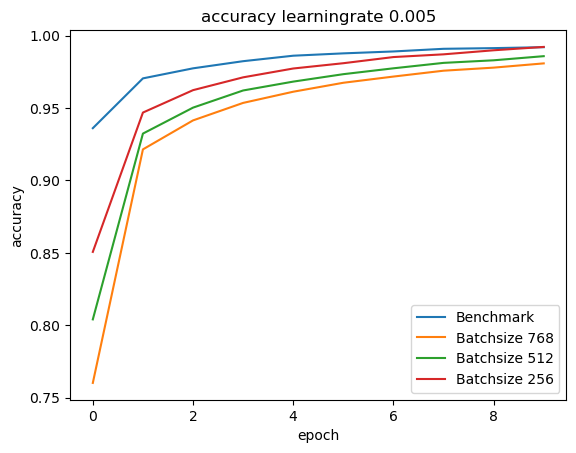

In [116]:
learningrate_list = [0.01, 0.001, 0.0001]
batchsize_list = [768, 512, 256]
history_bs_lr_list = [0, 0, 0, 0, 0, 0, 0, 0, 0]
validation_bs_lr_list = [0, 0, 0, 0, 0, 0, 0, 0, 0]
i = 0
for b in range(3):
    for l in range(3):
        temp_modelname = 'model_b' + str(batchsize_list[b]) +'_l' + str(learningrate_list[l])
        name = 'model_b' + str(batchsize_list[b]) +'_l' + str(learningrate_list[l])
        temp_modelname = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
    
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        ])

        temp_modelname.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learningrate_list[l]),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
    
        history_bs_lr_list[i] = temp_modelname.fit(x_train, y_train, batch_size= batchsize_list[b], epochs= 10, shuffle=True)
    
    
        _, validation_temp = temp_modelname.evaluate(x_validation, y_validation)
        validation_bs_lr_list[i] = round(validation_temp * 100, 4)
        print('validation accuracy of', name, 'is:', validation_bs_lr_list[i], ' %\n' )
        if i == 8:
            plt.plot(history1.history['accuracy'])
            plt.plot(history_bs_lr_list[2].history['accuracy'])
            plt.plot(history_bs_lr_list[5].history['accuracy'])
            plt.plot(history_bs_lr_list[8].history['accuracy'])
                                                               
            plt.title('accuracy batchsize 256')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['Benchmark','learningrate 0.01','learningrate 0.005', 'learningrate 0.0001'], loc='lower right')
            plt.show()
        
            plt.plot(history1.history['accuracy'])
            plt.plot(history_bs_lr_list[2].history['accuracy'])
            plt.plot(history_bs_lr_list[5].history['accuracy'])
            plt.plot(history_bs_lr_list[8].history['accuracy'])
                                                               
            plt.title('accuracy learningrate 0.005')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['Benchmark', 'Batchsize 768','Batchsize 512', 'Batchsize 256'], loc='lower right')
            plt.show()
        i = i+1

In [115]:
print('Genauigkeit von Model b768_l01:    ', validation_bs_lr_list[0], '%')
print('Genauigkeit von Model b768_l005:   ', validation_bs_lr_list[1], '%')
print('Genauigkeit von Model b768_l0001:  ', validation_bs_lr_list[2], '%\n')

print('Genauigkeit von Model b512_l01:    ', validation_bs_lr_list[3], '%')
print('Genauigkeit von Model b512_l005:   ', validation_bs_lr_list[4], '%')
print('Genauigkeit von Model b512_l0001:  ', validation_bs_lr_list[5], '%\n')

print('Genauigkeit von Model b256_l01:    ', validation_bs_lr_list[6], '%')
print('Genauigkeit von Model b256_l005:   ', validation_bs_lr_list[7], '%')
print('Genauigkeit von Model b256_l0001:  ', validation_bs_lr_list[8], '%\n')

Genauigkeit von Model b768_l01:     97.07 %
Genauigkeit von Model b768_l005:    97.89 %
Genauigkeit von Model b768_l0001:   97.28 %

Genauigkeit von Model b512_l01:     96.04 %
Genauigkeit von Model b512_l005:    97.87 %
Genauigkeit von Model b512_l0001:   97.5 %

Genauigkeit von Model b256_l01:     97.05 %
Genauigkeit von Model b256_l005:    97.08 %
Genauigkeit von Model b256_l0001:   97.91 %



Meine Daten:

    Genauigkeit von Model b768_l01:     97.24 %
    Genauigkeit von Model b768_l005:    97.68 %
    Genauigkeit von Model b768_l0001:   97.08 %

    Genauigkeit von Model b512_l01:     97.07 %
    Genauigkeit von Model b512_l005:    97.78 %
    Genauigkeit von Model b512_l0001:   97.55 %

    Genauigkeit von Model b256_l01:     96.97 %
    Genauigkeit von Model b256_l005:    98.23 %
    Genauigkeit von Model b256_l0001:   97.58 %
    

After variation of the batch size: 256, 512, 768 and learningrate: 0.01, 0.005, 0.0001, it can be seen that the learningrate of 0.005 is best at each batchsize. If you look at the different batchsizes at this Learningrate, you can see that a lower batch size achieves higher accuracy (see chart Batchsize). A smaller batch size than 256 converges faster, but has a lower validation accuracy. Larger batchsizes needs less trainingtime, but are also inaccurate.

If batch size remains the same, it becomes clear that smaller batch sizes need more epochs to obtain the same accuracy, so learningrate 0.0001 with more epochs will be more accurate than graph of the learningrate 0.01.
If the Learningrate is constant, it becomes recognizable again that the accuracy at 6 epochs is more evident than at 10 epochs, from this it can be revealed that the 3 graphs are closer to closer to more epochs.
<img src = 'Bild1.png'>
credit:https://wandb.ai/wandb_fc/german/reports/Was-ist-die-optimale-Batch-Gr-e-um-ein-neuronales-Netz-zu-trainieren---Vmlldzo1NTcwMjk#:~:text=Wir%20verwenden%20kein%20über-parametrisiertes,Batch-Größen%20für%2025%20Epochen.

##Best of

In [ ]:
temp = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
    
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dense(1024, activation='relu'),
    
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

temp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
    
history_temp = temp.fit(x_train, y_train, batch_size=8, epochs=20, shuffle=True)
    
    
    _, validation_bestof_temp = temp.evaluate(x_validation, y_validation)
    validation_acc_test = round(validation_bestof_temp * 100, 4)
    print('validation accuracy of', name, 'is:', validation_acc_test, ' %\n' )

## Kleine Auswertung

In [16]:
model1.save('model1', save_format='h5')
predictions = tf.keras.models.load_model('model1').predict([x_validation])
predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 7ms/step


In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_validation, predictions)
confusion_matrix_n = confusion_matrix/np.sum(confusion_matrix,axis=1).reshape(-1,1)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=0.1,
    fmt="d",
    square=True,
    ax=ax,
    cmap='Blues', 
)
plt.show()

In [22]:
import jupyterthemes as jt
!jt -r

Reset css and font defaults in:
C:\Users\maxha\.jupyter\custom &
C:\Users\maxha\AppData\Roaming\jupyter\nbextensions


In [ ]:
#JustForFun
#%tensorboard --logdir log/fit

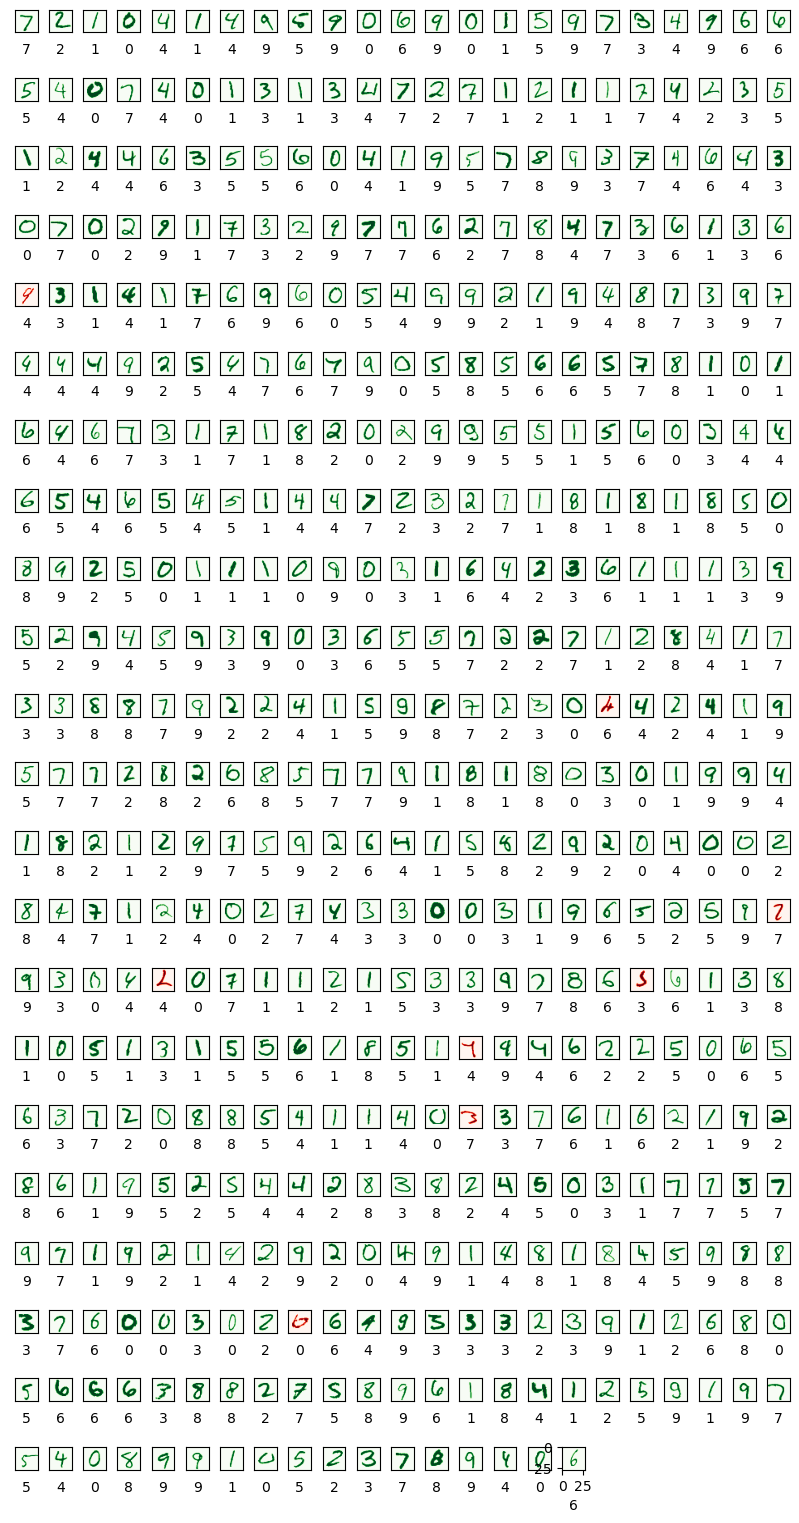

In [24]:
numbers_to_display = 500
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 20))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

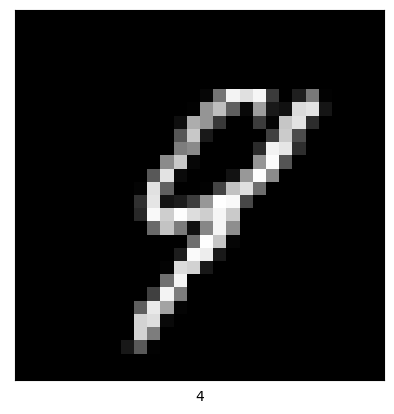

1/1 [==============================] - 0s 95ms/step
[[0.   0.   0.   0.   0.81 0.   0.   0.01 0.01 0.17]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


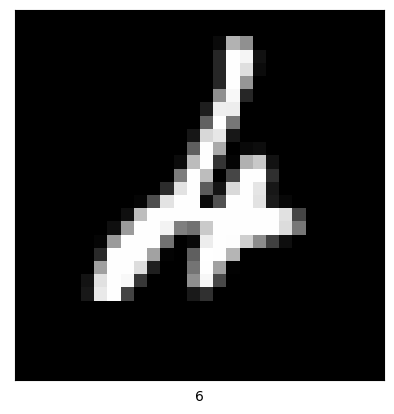

1/1 [==============================] - 0s 24ms/step
[[0.12 0.01 0.16 0.   0.12 0.   0.59 0.   0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


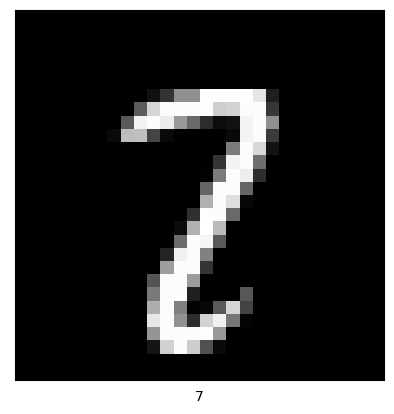

1/1 [==============================] - 0s 31ms/step
[[0.   0.   0.06 0.08 0.   0.   0.   0.86 0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


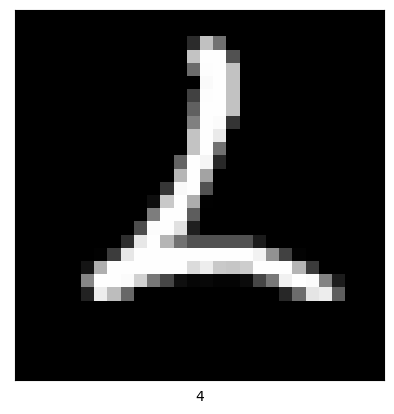

1/1 [==============================] - 0s 33ms/step
[[0.   0.   0.13 0.   0.87 0.   0.   0.   0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


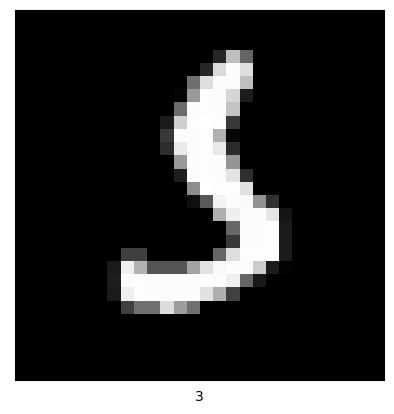

1/1 [==============================] - 0s 22ms/step
[[0.   0.   0.   0.95 0.   0.05 0.   0.   0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


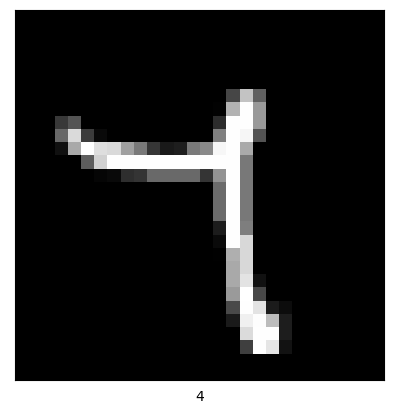

1/1 [==============================] - 0s 49ms/step
[[0.   0.   0.   0.   0.68 0.   0.   0.31 0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


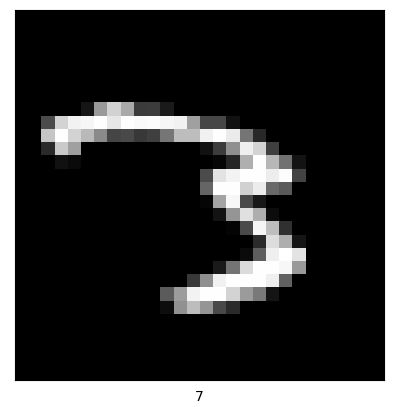

1/1 [==============================] - 0s 46ms/step
[[0.   0.02 0.05 0.25 0.01 0.01 0.   0.6  0.02 0.05]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


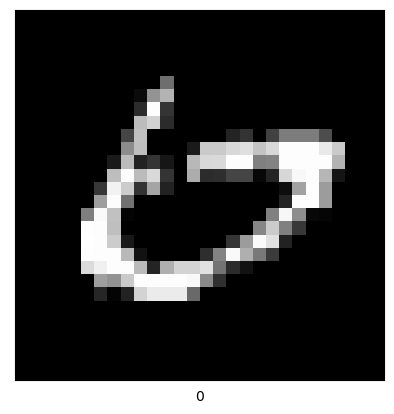

1/1 [==============================] - 0s 24ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


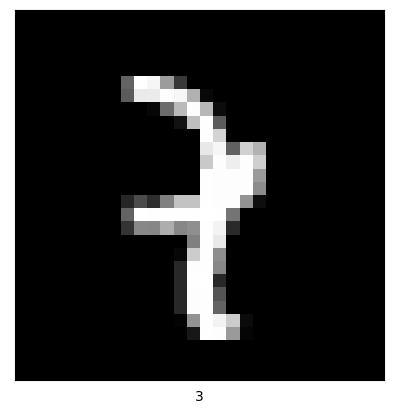

1/1 [==============================] - 0s 33ms/step
[[0.   0.   0.01 0.91 0.   0.   0.   0.07 0.01 0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


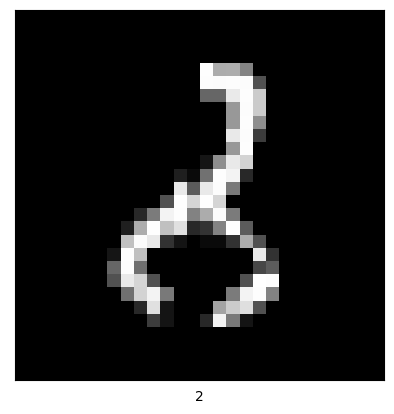

1/1 [==============================] - 0s 42ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


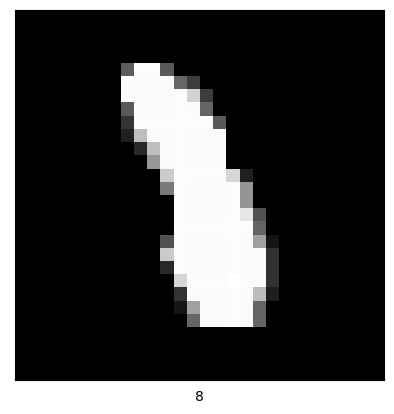

1/1 [==============================] - 0s 30ms/step
[[0.   0.07 0.01 0.   0.01 0.   0.   0.01 0.89 0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


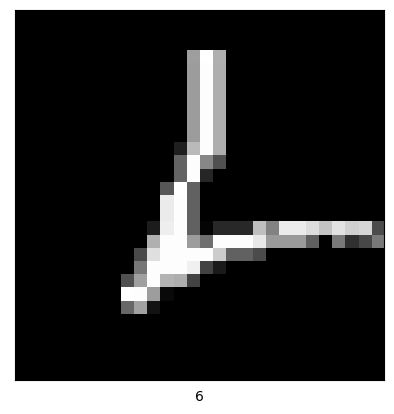

1/1 [==============================] - 0s 81ms/step
[[0.11 0.02 0.08 0.   0.02 0.   0.77 0.   0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


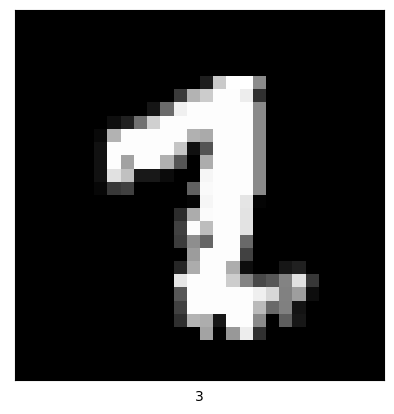

1/1 [==============================] - 0s 33ms/step
[[0.01 0.09 0.11 0.37 0.02 0.02 0.   0.16 0.18 0.04]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


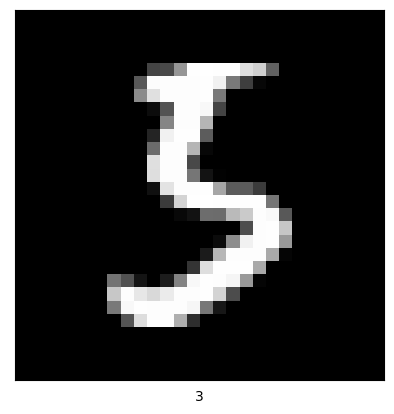

1/1 [==============================] - 0s 33ms/step
[[0.   0.   0.   0.56 0.   0.44 0.   0.   0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


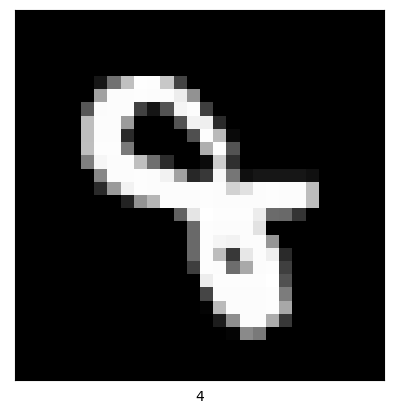

1/1 [==============================] - 0s 24ms/step
[[0.  0.  0.  0.  0.9 0.  0.  0.  0.1 0. ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


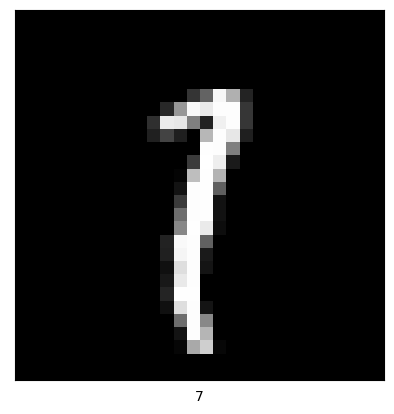

1/1 [==============================] - 0s 23ms/step
[[0.   0.45 0.   0.   0.   0.   0.   0.55 0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


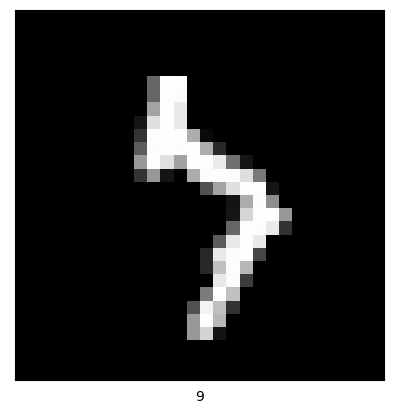

1/1 [==============================] - 0s 27ms/step
[[0.   0.1  0.01 0.01 0.29 0.02 0.   0.26 0.02 0.3 ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


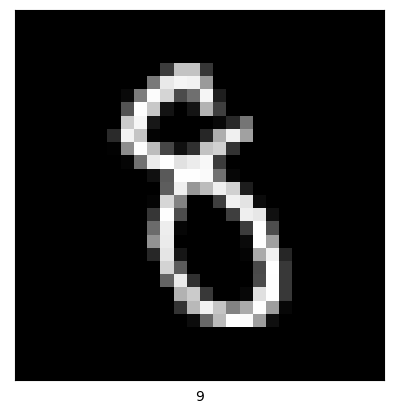

1/1 [==============================] - 0s 36ms/step
[[0.   0.   0.   0.06 0.   0.   0.   0.   0.26 0.66]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


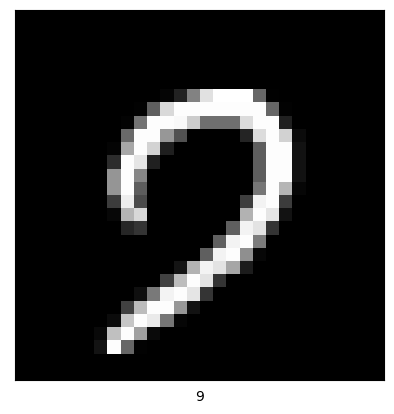

1/1 [==============================] - 0s 30ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.08 0.   0.92]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


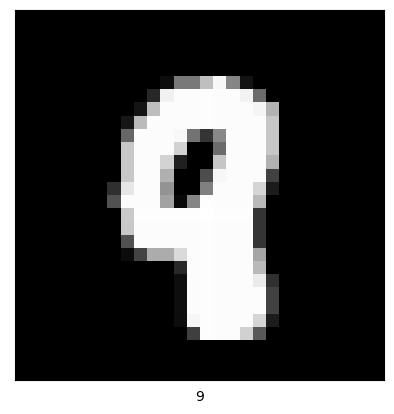

1/1 [==============================] - 0s 31ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.   0.03 0.97]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


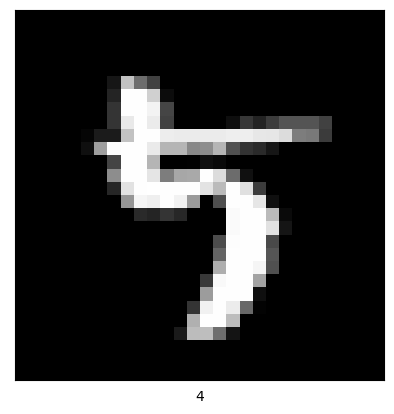

1/1 [==============================] - 0s 32ms/step
[[0.   0.   0.   0.   0.99 0.   0.   0.   0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


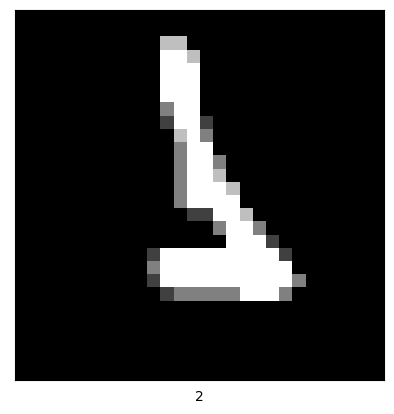

1/1 [==============================] - 0s 27ms/step
[[0.   0.04 0.92 0.   0.   0.   0.01 0.   0.02 0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


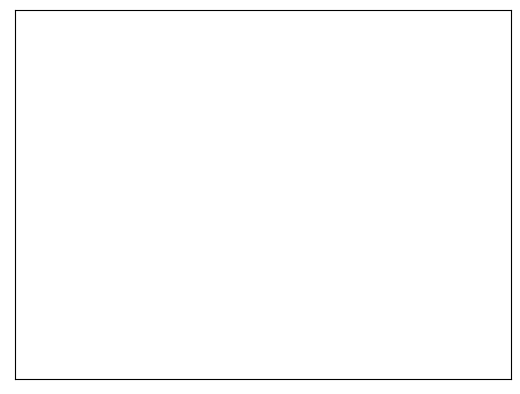

In [23]:
for plot_index in range(1000): 
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if predicted_label != y_validation[plot_index]:
        plt.imshow(x_validation[plot_index].reshape((28, 28)), cmap='gray')
        plt.xlabel(predicted_label)
        plt.show()
        print (np.round(model1.predict(np.expand_dims(x_validation[plot_index],0)),2))
        print('[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]') 